# MVP Predictions #

In [16]:
# -*- coding: utf-8 -*-#
"""
Created by MinhKhang Nguyen
July 27 2021 7:37 PM - August 6 2021 2:08 AM
"""

'\nCreated by MinhKhang Nguyen\nJuly 27 2021 7:37 PM - August 6 2021 2:08 AM\n'

In [17]:
import pandas as pd 
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import ssl
ssl._create_default_https_econtext = ssl._create_unverified_context

#### Importing Data ####

###### Importing Normal Stats ######

In [19]:
html_url = "https://www.basketball-reference.com/leagues/NBA_2022_per_game.html"
nba_tables = pd.read_html(html_url)
len(nba_tables)
nba = nba_tables[0]
nba.head(30)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get issuer certificate (_ssl.c:1125)>

In [20]:
nba.columns

NameError: name 'nba' is not defined

###### Importing Advanced Stats ######

In [21]:
html_url = "https://www.basketball-reference.com/leagues/NBA_2022_advanced.html"
advanced_tables = pd.read_html(html_url)
len(advanced_tables)
advanced = advanced_tables[0]
advanced.head(30)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get issuer certificate (_ssl.c:1125)>

In [ ]:
advanced.columns

#### Cleaning DataFrame ####

###### Cleaning Normal Stats ######

In [22]:
#renames columns to strings only#
nba.rename(
    columns={
        'FG%': 'FGP',
        '3P': 'TP',
        '3PA': 'TPA',
        '3P%': 'TPP',
        '2P': 'TWOP',
        '2PA': 'TWOPA',
        '2P%': 'TWOPP',
        'eFG%': 'eFGP',
        'FT%': 'FTP'
    }, inplace=True)

#removing duplicate players (stats of players that played on different teams)#
nba.drop_duplicates(subset=['Player'], keep=False, inplace=True)
#Dropping "Rk" Column#
nba.drop('Rk', axis=1, inplace=True)

#replacing NaN with 0#
nba.fillna(0, inplace=True)

nba[["G", "GS","MP","FG","FGA","FGP","TP","TPA","TPP","TWOP","TWOPA","TWOPP","eFGP","FT","FTA","FTP","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"]] = nba[["G", "GS","MP","FG","FGA","FGP","TP","TPA","TPP","TWOP","TWOPA","TWOPP","eFGP","FT","FTA","FTP","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"]].apply(pd.to_numeric)
nba

NameError: name 'nba' is not defined

###### Cleaning Advanced Stats ######

In [23]:
advanced.rename(
    columns={
        'WS': 'Win Shares',
        'BPM': 'Avg. Box +/-'
    }, inplace=True)

#removing duplicate players (stats of players that played on different teams)#
advanced.drop_duplicates(subset=['Player'], keep=False, inplace=True)
#Dropping "Rk" Column#
advanced.drop('Rk', axis=1, inplace=True)

#replacing NaN with 0#
advanced.fillna(0, inplace=True)

advanced[['Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr','ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%','Unnamed: 19', 'OWS', 'DWS', 'Win Shares', 'WS/48', 'Unnamed: 24', 'OBPM','DBPM', 'Avg. Box +/-', 'VORP']] = advanced[['Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr','ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%','Unnamed: 19', 'OWS', 'DWS', 'Win Shares', 'WS/48', 'Unnamed: 24', 'OBPM','DBPM', 'Avg. Box +/-', 'VORP']].apply(pd.to_numeric)
advanced.drop(['Player','Pos','Age','Tm','G','MP','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','OWS','DWS','WS/48','OBPM','DBPM','TS%','VORP','Unnamed: 19','Unnamed: 24'], axis=1, inplace=True)
shorter_advanced = advanced
shorter_advanced

NameError: name 'advanced' is not defined

In [24]:
nba = nba.loc[~nba.index.duplicated(keep='first')]
shorter_advanced = shorter_advanced.loc[~shorter_advanced.index.duplicated(keep='first')]
full = pd.concat([nba, shorter_advanced], axis=1)
full

NameError: name 'nba' is not defined

#### Filtering DataFrame ####

###### Filtering Normal Stats ######

In [11]:
full.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGP', 'TP',
       'TPA', 'TPP', 'TWOP', 'TWOPA', 'TWOPP', 'eFGP', 'FT', 'FTA', 'FTP',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER',
       'Win Shares', 'Avg. Box +/-'],
      dtype='object')

In [12]:
full[["G", "GS","MP","FG","FGA","FGP","TP","TPA","TPP","TWOP","TWOPA","TWOPP","eFGP","FT","FTA","FTP","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"]] = nba[["G", "GS","MP","FG","FGA","FGP","TP","TPA","TPP","TWOP","TWOPA","TWOPP","eFGP","FT","FTA","FTP","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"]].apply(pd.to_numeric)

In [13]:
full.drop(full[full['G'] <= 10].index, inplace = True)
full.drop(full[full['TP'] <= 0.1].index, inplace = True)
full.drop(full[full['TPA'] <= 0.1].index, inplace = True)
full.drop(full[full['TPP'] <= 0.1].index, inplace = True)
full.drop(full[full['PTS'] <= 21.1].index, inplace = True)

#### Processing the Data ####

In [14]:
for index, row in full.iterrows():
    full.loc[index, "Score"] = (((row['FGP']*row['TPP']*row['FTP'])*(row['PTS']+row['TRB']+row['STL']+row['AST']+row['BLK']-row['TOV']-(row['FGA']-row['FG']))*(1-row['eFGP']))*(row['PTS']+row['TRB']+row['STL']+(0.5*row['AST'])+(0.5*row['BLK'])-row['FGA']-row['TOV']-(0.5*row['FTA'])-(0.5*row['PF'])))
    
#NBA Efficiency Metric = (Points)+(Rebounds)+(Steals)+(Assists)+(Blocked Shots)-(Turnovers)-(Missed Shots)#
#Win Score = (Points)+(Rebounds)+(Steals)+(½Assists)+(½Blocked Shots)-(Field Goal Attempts)-(Turnovers)-½(Free Throw Attempts)-½Personal Fouls#
#My equation = (((FG%*3P%*FT%)NBA Efficiency)(1-eFG%))(Win Score)#

In [15]:
full.sort_values(by=['Score'], ascending=False, inplace=True)
full.drop(['GS','MP','FG','FGA','TP','TPA','TWOP','TWOPA','TWOPP','eFGP','FT','FTA','FTP','ORB','DRB','STL','BLK','TOV','PF','Avg. Box +/-'], axis=1, inplace=True)
mvp = full.head(15)
mvp = mvp.copy()
mvp['Advanced Score'] = (mvp['PER']*mvp['Win Shares'])/100
mvp['MVP Score'] = round(mvp['Score']*mvp['Advanced Score'],2)
mvp.drop(['Score', 'Advanced Score'], axis=1, inplace=True)
mvp.sort_values(by=['MVP Score'], ascending=False, inplace=True)
mvp = mvp.rename({'FGP': 'FG%', 'TPP': '3P%', 'TRB': 'REB'}, axis='columns')

In [16]:
mvp

,Player,Pos,Age,Tm,G,FG%,3P%,REB,AST,PTS,PER,Win Shares,MVP Score
235,Nikola Jokić,C,26,DEN,14,0.593,0.410,13.6,6.4,26.4,35.3,3.2,56.08
128,Kevin Durant,PF,33,BRK,16,0.567,0.427,7.9,4.9,28.6,27.8,2.9,28.17
107,Stephen Curry,PG,33,GSW,16,0.455,0.411,5.9,6.6,28.4,27.7,3.3,25.10
10,Giannis Antetokounmpo,PF,27,MIL,16,0.507,0.292,12.2,5.8,27.8,30.5,2.9,23.69
77,Jimmy Butler,SF,32,MIA,14,0.538,0.273,5.6,5.4,25.1,30.6,3.4,21.68
437,Karl-Anthony Towns,C,26,MIN,16,0.508,0.461,9.3,3.4,23.1,23.3,2.4,15.25
114,DeMar DeRozan,SF,32,CHI,17,0.489,0.364,5.4,4.2,26.8,24.7,2.8,12.88
108,Anthony Davis,C,28,LAL,18,0.522,0.171,10.5,3.1,24.6,26.1,2.6,9.31
176,James Harden,PG,32,BRK,17,0.416,0.379,7.7,8.8,21.2,21.5,2.1,8.80
318,Ja Morant,PG,22,MEM,16,0.497,0.368,5.9,7.0,25.1,25.0,1.7,7.54


#### Visualization ####

###### PER vs MVP Score Plot ######

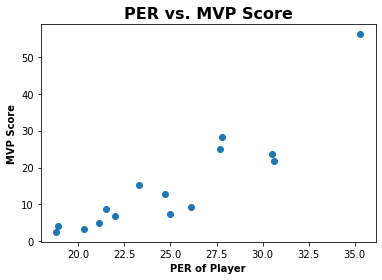

In [17]:
x = mvp['PER']
y = mvp['MVP Score']

plt.scatter(x, y)
plt.title('PER vs. MVP Score', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('PER of Player', fontdict={'fontweight':'bold'})
plt.ylabel('MVP Score', fontdict={'fontweight':'bold'})
plt.show()

In [18]:
#plt.savefig('PER vs. MVP Score.png')

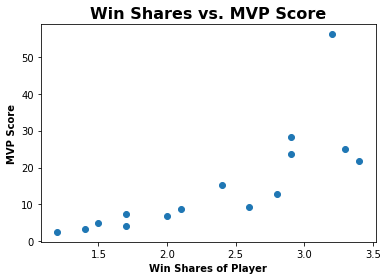

In [19]:
x = mvp['Win Shares']
y = mvp['MVP Score']

plt.scatter(x, y)
plt.title('Win Shares vs. MVP Score', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Win Shares of Player', fontdict={'fontweight':'bold'})
plt.ylabel('MVP Score', fontdict={'fontweight':'bold'})
plt.show()

In [20]:
#plt.savefig('Win Shares vs. MVP Score.png')

In [21]:
mvp.set_index(['Player', 'Pos', 'Age', 'Tm', 'G', 'REB', 'AST', 'PTS', 'FG%', '3P%', 'PER', 'Win Shares', 'MVP Score'], inplace=True)
mvp

,,,,,,,,,,,,
Player,Pos,Age,Tm,G,REB,AST,PTS,FG%,3P%,PER,Win Shares,MVP Score
Nikola Jokić,C,26,DEN,14,13.6,6.4,26.4,0.593,0.410,35.3,3.2,56.08
Kevin Durant,PF,33,BRK,16,7.9,4.9,28.6,0.567,0.427,27.8,2.9,28.17
Stephen Curry,PG,33,GSW,16,5.9,6.6,28.4,0.455,0.411,27.7,3.3,25.10
Giannis Antetokounmpo,PF,27,MIL,16,12.2,5.8,27.8,0.507,0.292,30.5,2.9,23.69
Jimmy Butler,SF,32,MIA,14,5.6,5.4,25.1,0.538,0.273,30.6,3.4,21.68
Karl-Anthony Towns,C,26,MIN,16,9.3,3.4,23.1,0.508,0.461,23.3,2.4,15.25
DeMar DeRozan,SF,32,CHI,17,5.4,4.2,26.8,0.489,0.364,24.7,2.8,12.88
Anthony Davis,C,28,LAL,18,10.5,3.1,24.6,0.522,0.171,26.1,2.6,9.31
James Harden,PG,32,BRK,17,7.7,8.8,21.2,0.416,0.379,21.5,2.1,8.80


#### Exporting ####

###### MVP Table to CSV ######

In [27]:
import datetime

current_date = datetime.datetime.now()
filename = str(current_date.month)+"-"+str(current_date.day)+"-"+str(current_date.year)
output = mvp.to_csv(str("MVP " + filename))

In [23]:
#mvp.to_xlsx(output)